In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Armchair

In [3]:
alpha = 0.0
beta = 2.8
a = 1.0

N = 9

# Static terms
H = np.identity(2*N, dtype = complex) * alpha


for i in range(2*N):
    for j in range(2*N):
        if j == i+1 or j == i-1:
            H[i,j] = beta      
    
# Diagonalization

k_array = np.linspace(-np.pi/a, np.pi/a, 50)
E_array = np.zeros((len(k_array), 2*N))

for idx, k in enumerate(k_array):

    counter = 0

    for i in range(2*N):
        for j in range(2*N):
            if i+j == (2*N)-1:
                counter = counter + 1
                if counter % 2 != 0:
                    H[i,j] = beta
                else:
                    if counter > N:
                        H[i,j] = beta*np.exp(+1j*k*a)
                    else:
                        H[i,j] = beta*np.exp(-1j*k*a)

    E_array[idx] = np.linalg.eigvalsh(H)

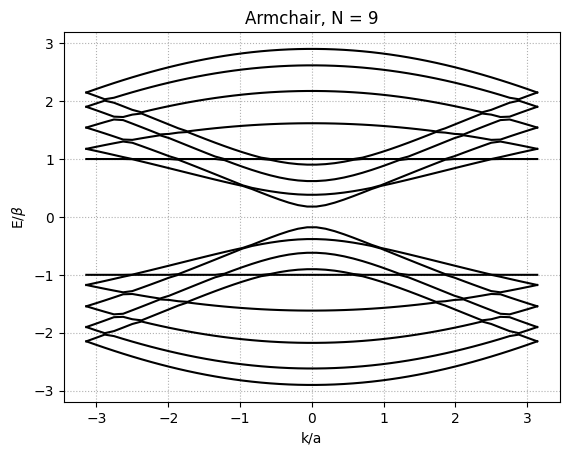

In [4]:
plt.plot(k_array/a, E_array/beta, c='k')
plt.xlabel('k/a')
plt.ylabel(r'E/$\beta$')
plt.title(f'Armchair, N = {N}')
plt.grid(ls=':')
plt.show()

# Zigzag

In [21]:
N = 16
alpha = 0.0
beta = -1

# Static
H = np.identity(2*N, dtype=np.complex128) * alpha

for i in range(2*N):
    for j in range(2*N):
        if j == i+1 or j == i-1:
            H[i,j] = beta
            
# Diagonalization

k_array = np.linspace(-np.pi/a, np.pi/a, 50)
E_array = np.zeros((len(k_array), 2*N))

for idx, k in enumerate(k_array):
    
    # Upper diagonal
    counter = 0
    sgn = 1

    for i in range(2*N):
        for j in range(2*N):
            if j == i+1:
                counter = counter + 1
                if counter % 2 == 1:
                    H[i,j] = H[i,j] + beta*np.exp(+sgn*1j*k*a)
                    sgn = sgn * (-1)

    # Lower diagonal
    counter = 0
    sgn = 1

    for i in range(2*N):
        for j in range(2*N):
            if j == i-1:
                counter = counter + 1
                if counter % 2 == 1:
                    H[i,j] = H[i,j] + beta*np.exp(-sgn*1j*k*a)
                    sgn = sgn * (-1)
                
    E_array[idx] = np.linalg.eigvalsh(H)

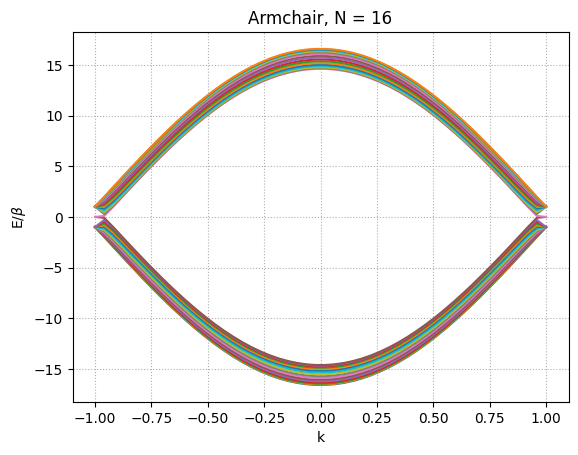

In [22]:
plt.plot(k_array/np.pi, E_array)
plt.xlabel('k')
plt.ylabel(r'E/$\beta$')
plt.title(f'Armchair, N = {N}')
plt.grid(ls=':')
plt.show()

In [19]:
N = 3
alpha = 0.0
beta = -1

# Static
H = np.identity(2*N, dtype=complex) * alpha

for i in range(2*N):
    for j in range(2*N):
        if j == i+1 or j == i-1:
            H[i,j] = beta


k = np.pi/2

counter = 0
sgn = 1

for i in range(2*N):
        for j in range(2*N):
            if j == i+1:
                counter = counter + 1
                if counter % 2 == 1:
                    H[i,j] = H[i,j] + beta*np.exp(+sgn*1j*k*a)
                    sgn = sgn * (-1)

# Lower diagonal
counter = 0
sgn = 1

for i in range(2*N):
    for j in range(2*N):
        if j == i-1:
            counter = counter + 1
            if counter % 2 == 1:
                H[i,j] = H[i,j] + beta*np.exp(-sgn*1j*k*a)
                sgn = sgn * (-1)
                



In [20]:
for i in range(2*N):                
    print(H[i])

[ 0.+0.j -1.-1.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
[-1.+1.j  0.+0.j -1.+0.j  0.+0.j  0.+0.j  0.+0.j]
[ 0.+0.j -1.+0.j  0.+0.j -1.+1.j  0.+0.j  0.+0.j]
[ 0.+0.j  0.+0.j -1.-1.j  0.+0.j -1.+0.j  0.+0.j]
[ 0.+0.j  0.+0.j  0.+0.j -1.+0.j  0.+0.j -1.-1.j]
[ 0.+0.j  0.+0.j  0.+0.j  0.+0.j -1.+1.j  0.+0.j]
